In [49]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy as sc
import matplotlib.pyplot as plt

In [54]:
#Q1 and Q2
dat=pd.read_csv("C:\\Users\\shreyas.raghavan\\Desktop\\Personalization L0 Forecasting Case study 4 data.csv")
dat.head()

,Date,Sales
0,1/1/1980,464
1,2/1/1980,675
2,3/1/1980,703
3,4/1/1980,887
4,5/1/1980,1139


In [55]:
dat.Date = pd.to_datetime(dat.Date)
dat.set_index('Date', inplace=True)

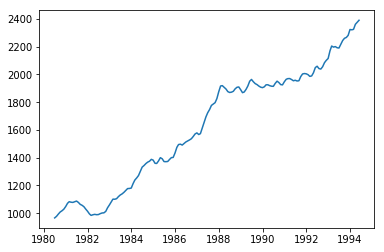

In [238]:
#Question 3
dat.head()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dat)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.plot(trend, label='Trend')

plt.show()

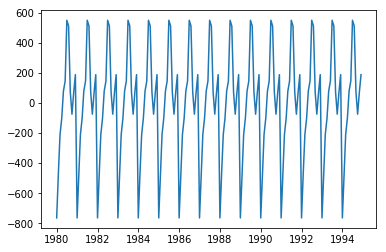

In [236]:
plt.plot(seasonal, label='Trend')

plt.show()

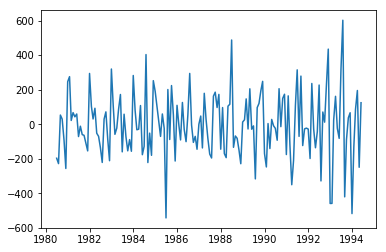

In [237]:
plt.plot(residual, label='Trend')
plt.show()

In [57]:
dat.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


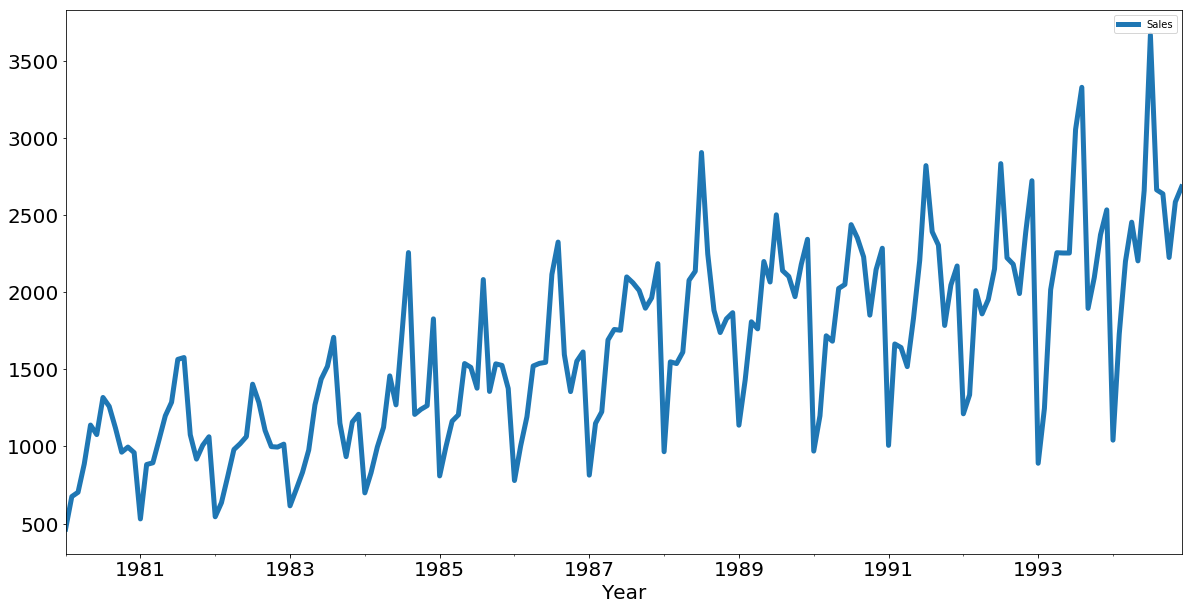

In [58]:
plt.show()

#THERE SEEMS TO BE SEASONALITY , TREND and noise IN THE DATA

In [59]:
##QUESTION 2
##TREND
dat.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

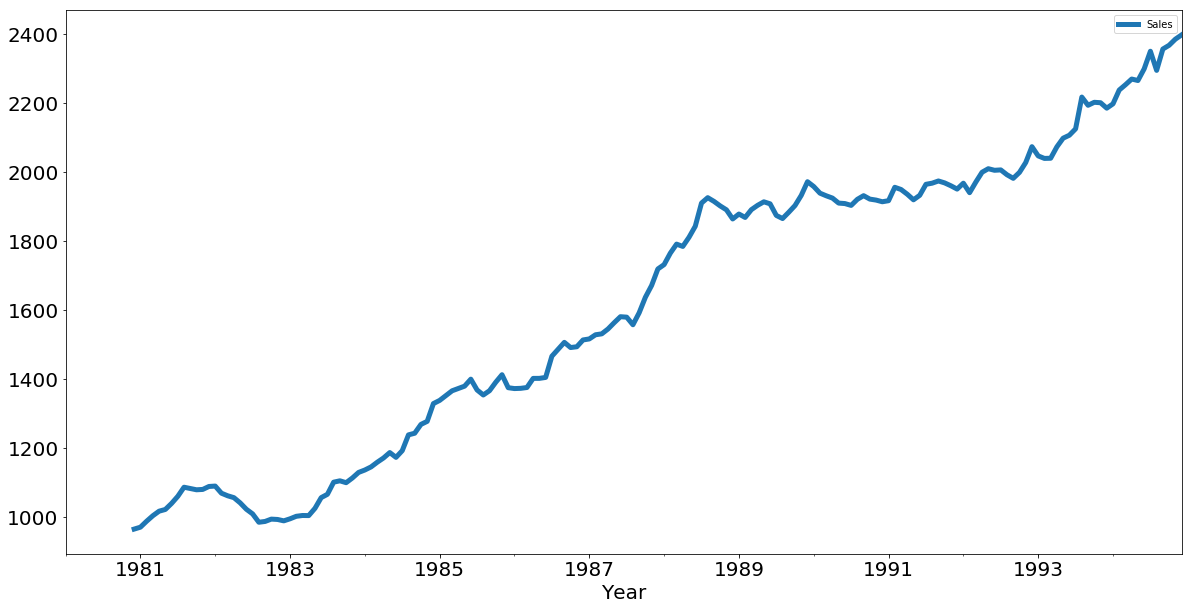

In [60]:
plt.show()

#THE TREND IS An upward  LINE . THERE IS Multiplicative seasonality

In [61]:
#Seasonality
dat.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

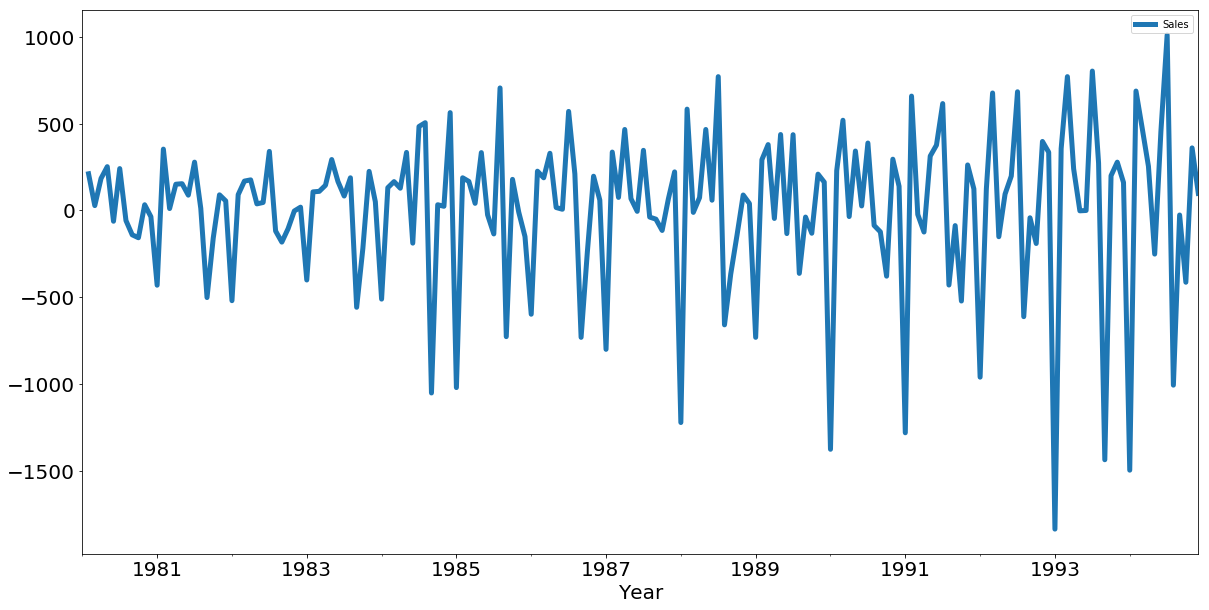

In [62]:
plt.show()

In [ ]:
#THERE SEEMS TO BE A SPIKE EVERY JANUARY AND A TROUGH EVERY NOVEMBER . The data is similar in all the middle months. 


In [67]:
datq=pd.DataFrame(dat.resample('Q')['Sales'].sum()) #making it into quaterly data by summing each quarter's value

In [70]:
datq.head()

,Sales
Date,
1980-03-31,1842
1980-06-30,3103
1980-09-30,3698
1980-12-31,2919
1981-03-31,2307


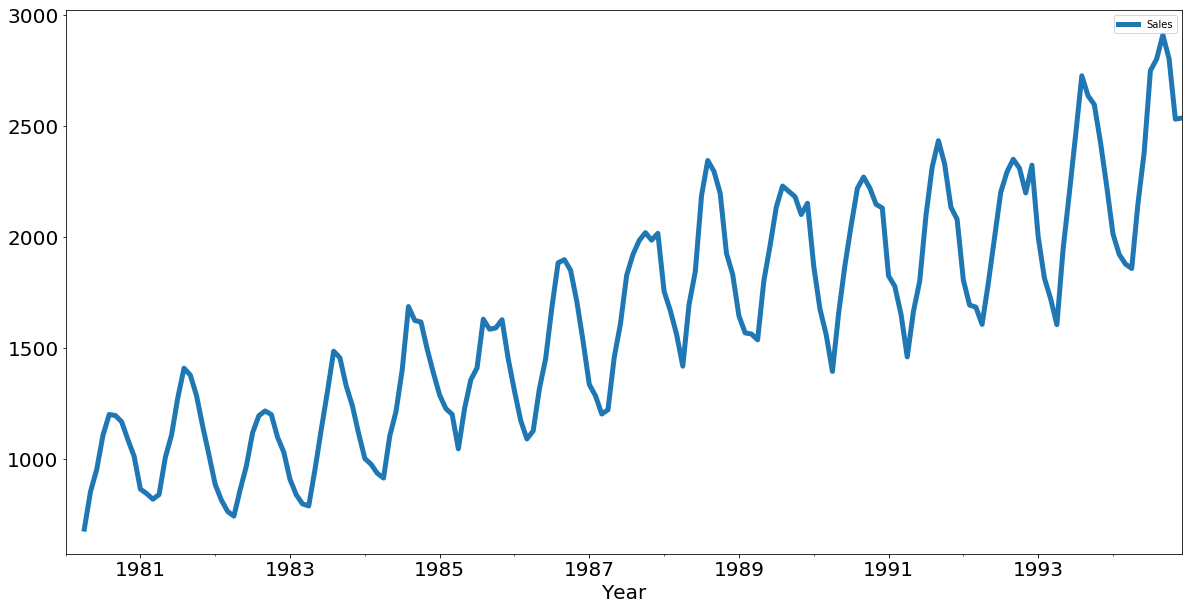

In [74]:
dat.rolling(4).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.show() #Quaterly Trend

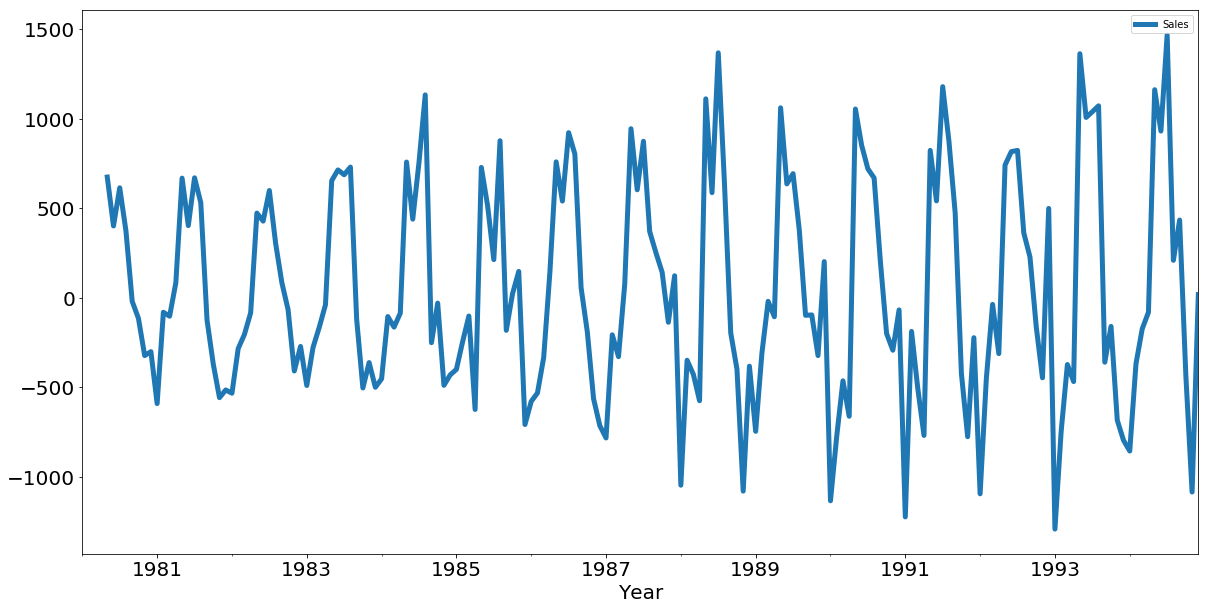

In [75]:
#Quaterly Seasonality
dat.diff(4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.show()

In [83]:
#There is an upward trend in the data .
# Looks like the sales hits a peak every january 

In [182]:
#Question 4

TrainM= dat['1980-01-01':'1993-12-31']
TestM = dat ['1993-12-31':] #Train and Test split monthly data

In [202]:
TrainQ= datq['1980-01-01':'1994-03-31']
TestQ = datq ['1994-03-31':] #Train and test split quaterly data


In [184]:
#Naive model Monthly data
dd= np.asarray(TrainM.Sales)
y_hat = TestM.copy()
y_hat['naive'] = dd[len(dd)-1]


In [185]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(TestM.Sales, y_hat.naive))
print(rms)


616.6205613395216


In [186]:
#Naive model Quaterly data
dd= np.asarray(TrainQ.Sales)
y_hat = TestQ.copy()
y_hat['naive'] = dd[len(dd)-1]


In [187]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(TestQ.Sales, y_hat.naive))
print(rms)


2642.4653734722806


In [228]:
#Simple Moving Average Monthly data
y_hat_avg = TestM.copy()
y_hat_avg['avg_forecast'] = TrainM['Sales'].mean()


In [229]:
rms = sqrt(mean_squared_error(TestM.Sales, y_hat_avg.avg_forecast))
print(rms)

1017.9092125361605


In [ ]:
#Simple Moving Average Quaterly Data

In [230]:
y_hat_avg = TestQ.copy()
y_hat_avg['avg_forecast'] = TrainQ['Sales'].mean()


In [231]:
rms = sqrt(mean_squared_error(TestQ.Sales, y_hat_avg.avg_forecast))
print(rms)

2847.779256891829


In [203]:
#Moving Average Monthly Data
y_hat_avg = TestM.copy()
y_hat_avg['moving_avg_forecast'] = TrainM['Sales'].rolling(12).mean().iloc[-1]

In [204]:
rms = sqrt(mean_squared_error(TestM.Sales, y_hat_avg.moving_avg_forecast))
print(rms)

637.3245510203835


In [206]:
#Moving Average Quarterly Data
y_hat_avg = TestQ.copy()
y_hat_avg['moving_avg_forecast'] = TrainQ['Sales'].rolling(4).mean().iloc[-1]

In [208]:
rms = sqrt(mean_squared_error(TestQ.Sales, y_hat_avg.moving_avg_forecast))
print(rms)


1497.7501251877763


In [232]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

##Pacakge Import error occured . SME and Holts couldnt be done

ImportError: cannot import name 'ExponentialSmoothing'

In [ ]:
#Question 5
# We choose  the best model based on the RMSE value .The model with the least RMSE would be the best model
# Naive have the worst error and Exponential Smoothening would produce the best output
